## Weather Data Prediction Model

In [ ]:
import pandas as pd

In [ ]:
global_temp = pd.read_csv('weather_data.csv')

In [ ]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [ ]:
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull())

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

In [ ]:
def clean_data(df):
  df = df.copy()
  df = df.drop(columns = ["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"])
  df["dt"] = pd.to_datetime(df["dt"])
  df["month"] = df["dt"].dt.month
  df["year"] = df["dt"].dt.year
  df = df.drop(columns = ["dt"], axis = 1)
  df = df.drop(columns = ["month"], axis = 1)
  df = df.dropna()
  df = df.set_index("year")
  return df

global_temp = clean_data(global_temp)
print(global_temp.head())


      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
year                                                                   
1850                   0.749               8.242              -3.206   
1850                   3.071               9.970              -2.291   
1850                   4.954              10.347              -1.905   
1850                   7.217              12.934               1.018   
1850                  10.004              15.655               3.811   

      LandAndOceanAverageTemperature  
year                                  
1850                          12.833  
1850                          13.588  
1850                          14.043  
1850                          14.667  
1850                          15.507  


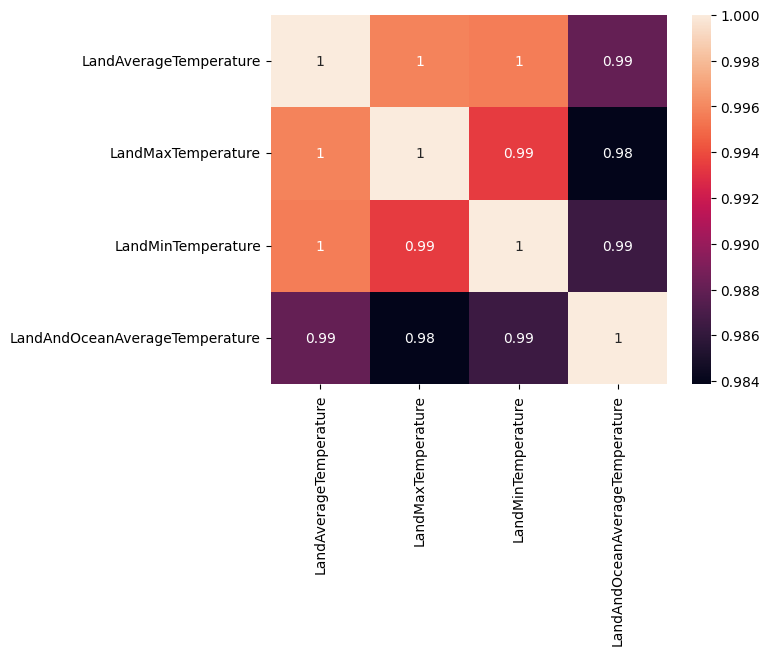

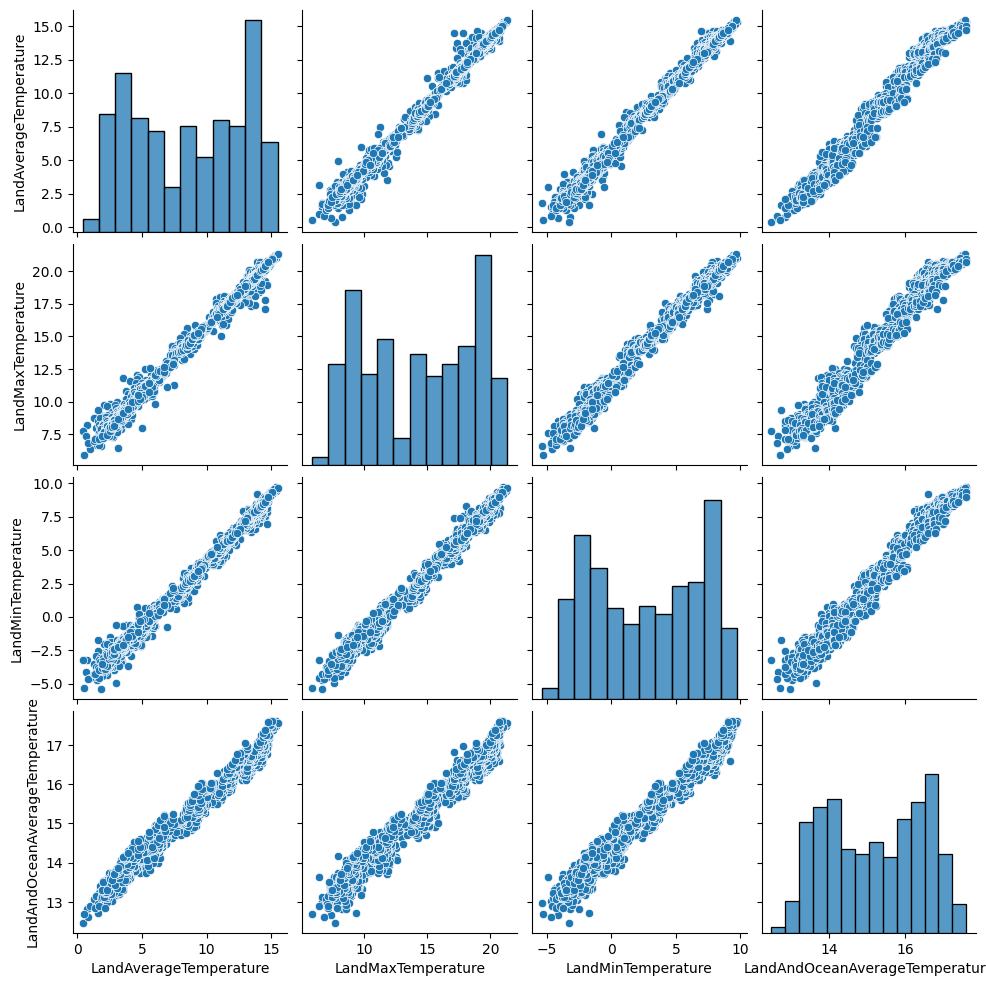

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

sns.pairplot(global_temp)
plt.show()

In [ ]:

target = "LandAndOceanAverageTemperature"
X = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]
Y = global_temp[target]

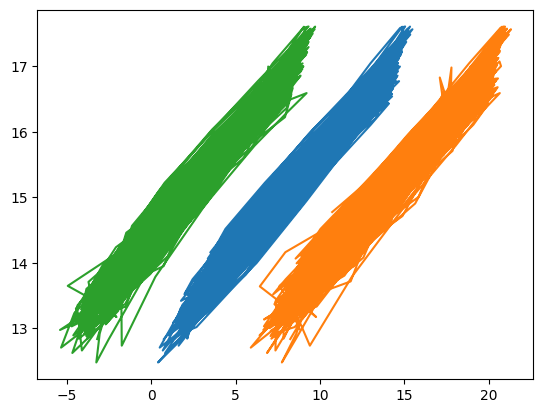

In [ ]:
plt.plot(X,Y)

First to import the TrainTestSplit from sklearn


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X, Y, test_size=0.25, random_state=45)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


Comparing with base line matrix with mean sqauared error

In [ ]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)
mse = mean_squared_error(ytrain, ypred)
print("Baseline MAE:", mse)

Baseline MAE: 1.6355012942573515


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, max_depth=50, n_jobs=-1, random_state=80)
)
forest.fit(xtrain, ytrain)


Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=80))])

In [ ]:
forest.score(xtrain, ytrain)

0.9971759038083774

MSE

In [ ]:
import numpy as np
ypred = forest.predict(xval)
mse = mean_squared_error(yval, ypred)
print("Test MAE:", mse)

Test MAE: 0.02949367880080367


In [ ]:
import numpy as np
ypred = forest.predict(xtrain)
mse = mean_squared_error(ytrain, ypred)
print("Train MAE:", mse)

Train MAE: 0.004618812976506036


RMSE

In [ ]:
import numpy as np
ypred = forest.predict(xtrain)
mse = mean_squared_error(ytrain, ypred)
rmse = np.sqrt(mse)
print("Train RMSE:", rmse)

Train RMSE: 0.06796184941940611


In [ ]:
import numpy as np


rmse = np.sqrt(mse)
print("Train RMSE:", rmse)

Train RMSE: 0.06796184941940611


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

ypred_train = forest.predict(xtrain)
train_mse = mean_squared_error(ytrain, ypred_train)
train_rmse = np.sqrt(train_mse)
print("Train RMSE:", train_rmse)

Train RMSE: 0.06796184941940617


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

ypred_test = forest.predict(xval)

test_mse = mean_squared_error(yval, ypred_test)

test_rmse = np.sqrt(test_mse)
print("Test RMSE:", test_rmse)

Test RMSE: 0.171737237664997


R2

In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(ytrain, ypred_train)
print("Train R2 Score:", train_r2)

Train R2 Score: 0.9971759038083774


In [ ]:
from sklearn.metrics import r2_score

test_r2 = r2_score(yval, ypred_test)
print("Test R2 Score:", test_r2)

Test R2 Score: 0.981369434592935


Comparision

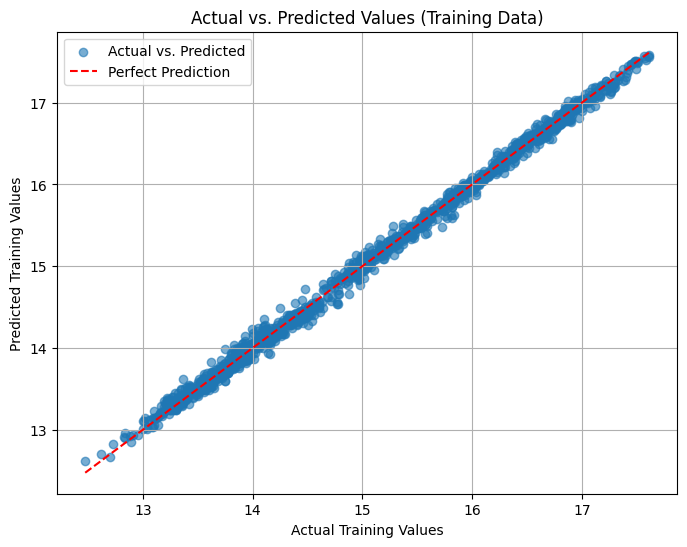

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(ytrain, ypred_train, alpha=0.6, label='Actual vs. Predicted')
plt.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values (Training Data)')
plt.xlabel('Actual Training Values')
plt.ylabel('Predicted Training Values')
plt.legend()
plt.grid(True)
plt.show()

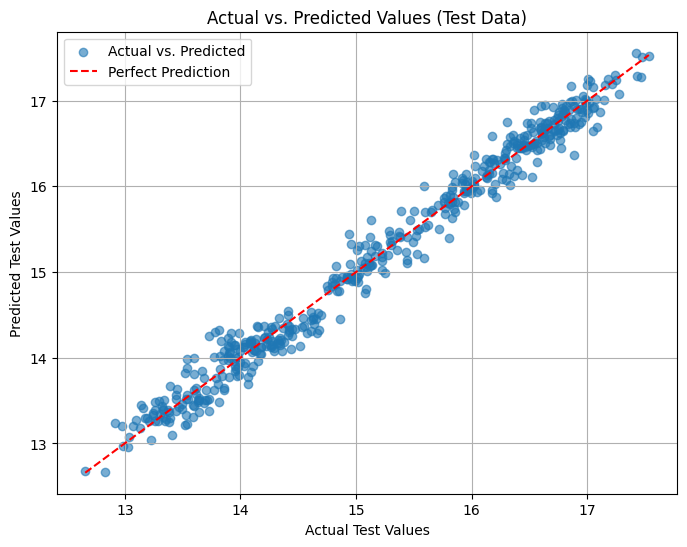

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(yval, ypred_test, alpha=0.6, label='Actual vs. Predicted')
plt.plot([yval.min(), yval.max()], [yval.min(), yval.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values (Test Data)')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.legend()
plt.grid(True)
plt.show()

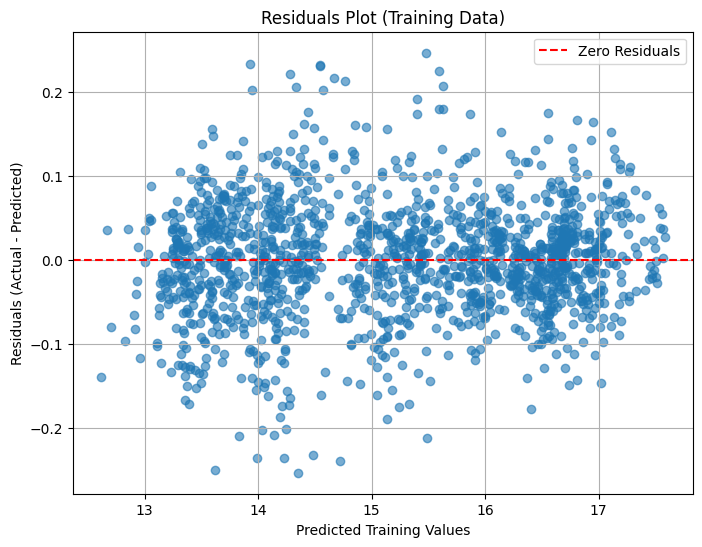

In [ ]:
import matplotlib.pyplot as plt


train_residuals = ytrain - ypred_train

plt.figure(figsize=(8, 6))
plt.scatter(ypred_train, train_residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot (Training Data)')
plt.xlabel('Predicted Training Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

metrics_data = {
    'Metric': [
        'Mean Squared Error', 'Mean Squared Error',
        'Root Mean Squared Error', 'Root Mean Squared Error',
        'R-squared', 'R-squared'
    ],
    'Dataset': [
        'Training', 'Test',
        'Training', 'Test',
        'Training', 'Test'
    ],
    'Value': [
        train_mse, test_mse,
        train_rmse, test_rmse,
        train_r2, test_r2
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.head(6))


                    Metric   Dataset     Value
0       Mean Squared Error  Training  0.004619
1       Mean Squared Error      Test  0.029494
2  Root Mean Squared Error  Training  0.067962
3  Root Mean Squared Error      Test  0.171737
4                R-squared  Training  0.997176
5                R-squared      Test  0.981369


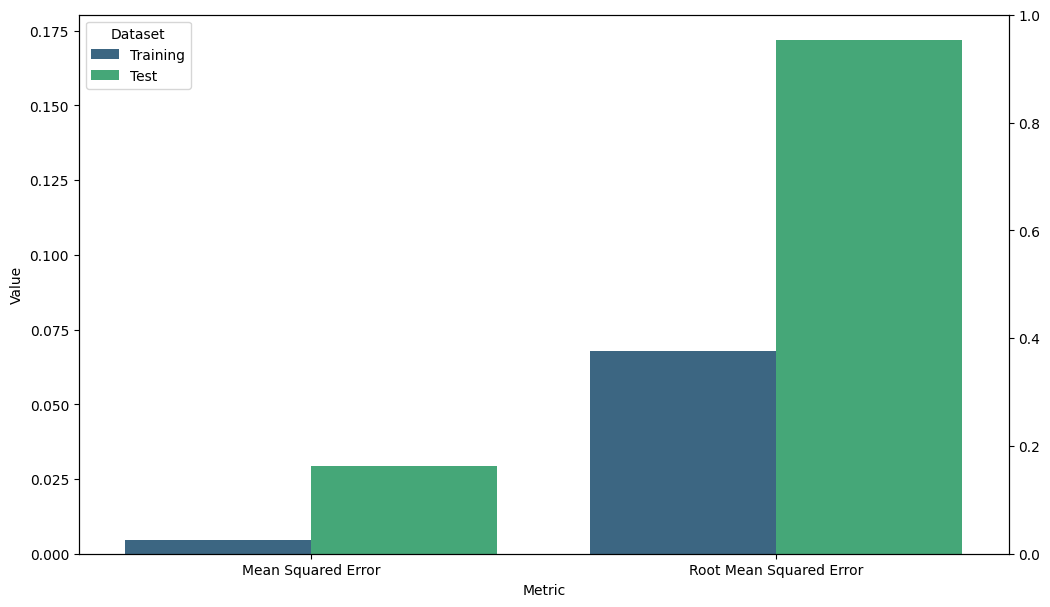

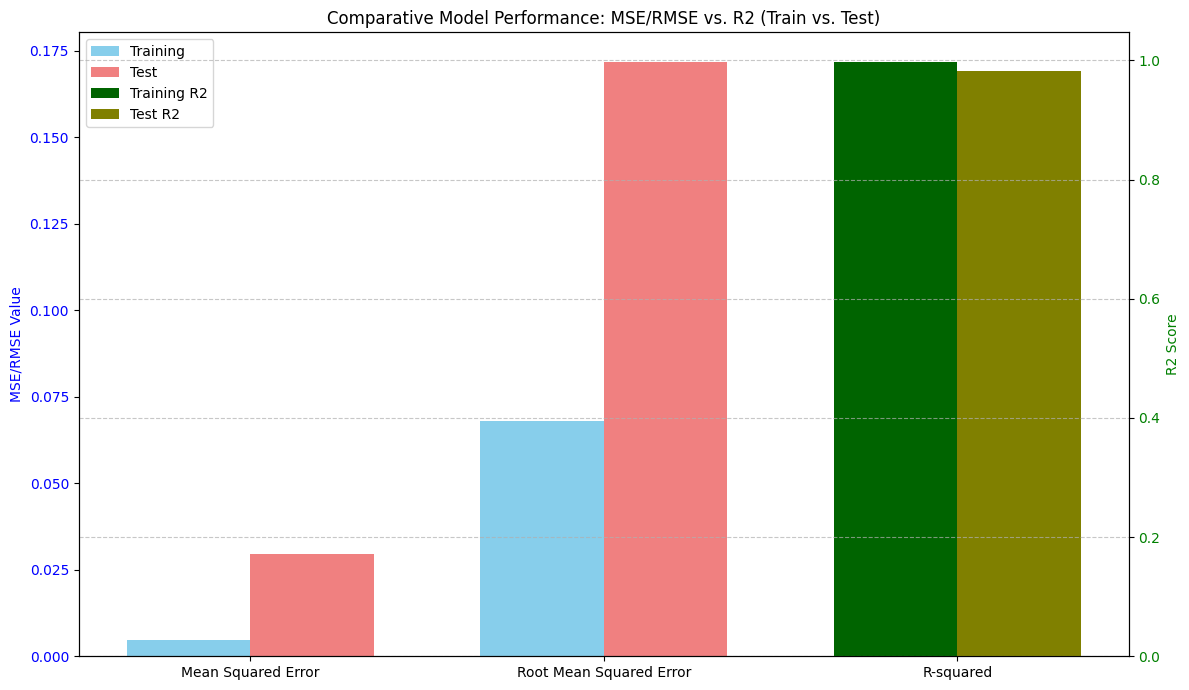

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the metrics_df DataFrame for R2 scores and for MSE/RMSE values
r2_df = metrics_df[metrics_df['Metric'] == 'R-squared']
mse_rmse_df = metrics_df[metrics_df['Metric'].isin(['Mean Squared Error', 'Root Mean Squared Error'])]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot MSE and RMSE on the primary y-axis (ax1)
sns.barplot(x='Metric', y='Value', hue='Dataset', data=mse_rmse_df, ax=ax1, palette='viridis')

# Plot R2 scores on the secondary y-axis (ax2)
# To ensure R2 bars are aligned and distinct, we can plot them as a separate bar set
# and adjust positions, or use a different visualization type if bars overlap too much.
# For now, let's plot them as bars and adjust colors/width if needed.

# Adjust x-tick positions for R2 to avoid overlap. This often requires manually positioning bars
# or using a combined approach. For a clearer visualization, we can treat R2 differently.

# A better approach for combined bar charts on twin axes is to plot them separately and adjust positions
# or simply combine the legend. However, seaborn's barplot automatically handles hue groups.
# Let's try plotting R2 as lines or points if bars overlap too much for clarity, but the request was bars.

# For better visual separation and to avoid `hue` conflicts with different dataframes on the same axes,
# let's try plotting one type of metric on each axis, and then managing legends manually.

# Let's replot with a slightly different strategy to ensure clarity
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

# Bar width for positioning
bar_width = 0.35

# Get unique metrics for x-axis labels from mse_rmse_df
mse_rmse_metrics = mse_rmse_df['Metric'].unique()
x_pos_mse_rmse = range(len(mse_rmse_metrics))

# Plotting MSE/RMSE on ax1
for i, metric in enumerate(mse_rmse_metrics):
    train_value = mse_rmse_df[(mse_rmse_df['Metric'] == metric) & (mse_rmse_df['Dataset'] == 'Training')]['Value'].iloc[0]
    test_value = mse_rmse_df[(mse_rmse_df['Metric'] == metric) & (mse_rmse_df['Dataset'] == 'Test')]['Value'].iloc[0]

    ax1.bar(x_pos_mse_rmse[i] - bar_width/2, train_value, bar_width, label='Training' if i == 0 else "", color='skyblue')
    ax1.bar(x_pos_mse_rmse[i] + bar_width/2, test_value, bar_width, label='Test' if i == 0 else "", color='lightcoral')

ax1.set_ylabel('MSE/RMSE Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x_pos_mse_rmse)
ax1.set_xticklabels(mse_rmse_metrics)

# Plotting R2 on ax2
x_pos_r2 = len(mse_rmse_metrics) # Position R2 bars after MSE/RMSE

train_r2_value = r2_df[r2_df['Dataset'] == 'Training']['Value'].iloc[0]
test_r2_value = r2_df[r2_df['Dataset'] == 'Test']['Value'].iloc[0]

ax2.bar(x_pos_r2 - bar_width/2, train_r2_value, bar_width, color='darkgreen', label='Training R2')
ax2.bar(x_pos_r2 + bar_width/2, test_r2_value, bar_width, color='olive', label='Test R2')

ax2.set_ylabel('R2 Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_xticks(list(x_pos_mse_rmse) + [x_pos_r2])
ax2.set_xticklabels(list(mse_rmse_metrics) + ['R-squared'])


# Title and legend
plt.title('Comparative Model Performance: MSE/RMSE vs. R2 (Train vs. Test)')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

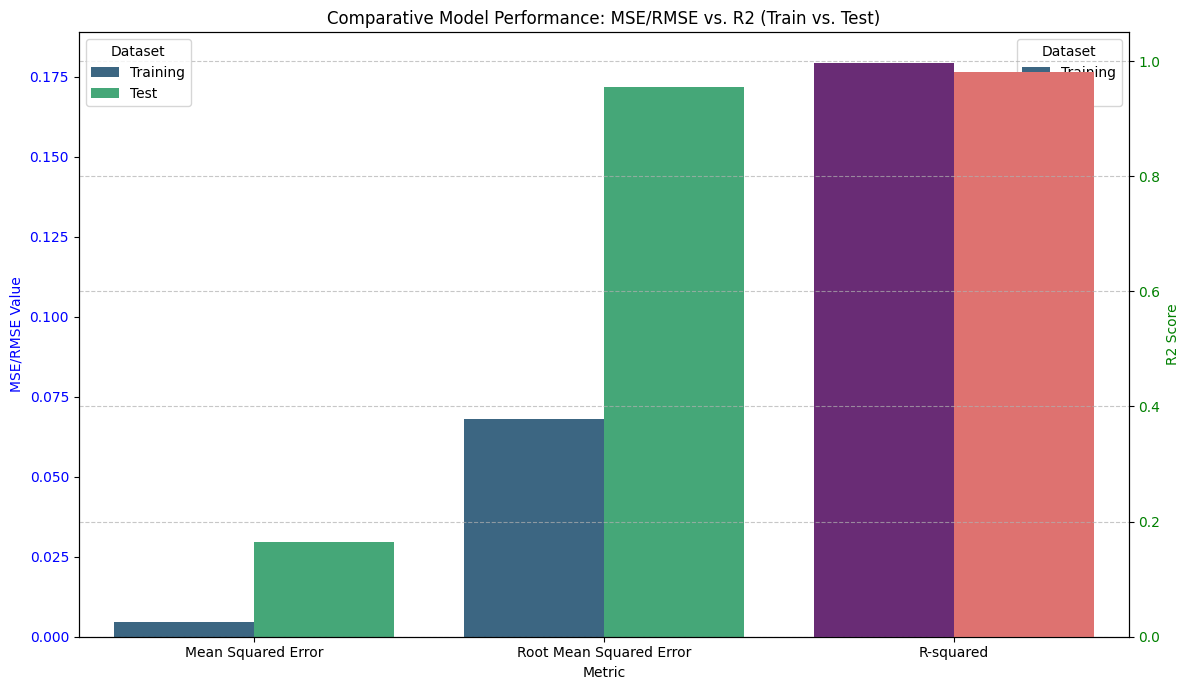

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recreate metrics_df to ensure it's defined in this scope
metrics_data = {
    'Metric': [
        'Mean Squared Error', 'Mean Squared Error',
        'Root Mean Squared Error', 'Root Mean Squared Error',
        'R-squared', 'R-squared'
    ],
    'Dataset': [
        'Training', 'Test',
        'Training', 'Test',
        'Training', 'Test'
    ],
    'Value': [
        train_mse, test_mse,
        train_rmse, test_rmse,
        train_r2, test_r2
    ]
}
metrics_df = pd.DataFrame(metrics_data)

# Filter the metrics_df DataFrame for R2 scores and for MSE/RMSE values
r2_df = metrics_df[metrics_df['Metric'] == 'R-squared']
mse_rmse_df = metrics_df[metrics_df['Metric'].isin(['Mean Squared Error', 'Root Mean Squared Error'])]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot MSE and RMSE on the primary y-axis (ax1)
sns.barplot(x='Metric', y='Value', hue='Dataset', data=mse_rmse_df, ax=ax1, palette='viridis')
ax1.set_ylabel('MSE/RMSE Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, max(mse_rmse_df['Value']) * 1.1) # Set reasonable y-limit

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot R2 scores on the secondary y-axis (ax2)
# For R2 scores, we'll plot them as a separate bar plot, ensuring 'Dataset' is handled for hue
sns.barplot(x='Metric', y='Value', hue='Dataset', data=r2_df, ax=ax2, palette='magma')
ax2.set_ylabel('R2 Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1.05) # R2 scores are typically between 0 and 1

# Set X-axis labels and title
ax1.set_xlabel('Metric')
plt.title('Comparative Model Performance: MSE/RMSE vs. R2 (Train vs. Test)')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Remove duplicate labels if any, and combine
combined_labels = list(dict.fromkeys(labels1 + labels2)) # Remove duplicates while preserving order
combined_handles = []
for label in combined_labels:
    if label in labels1: combined_handles.append(handles1[labels1.index(label)])
    elif label in labels2: combined_handles.append(handles2[labels2.index(label)])

plt.legend(combined_handles, combined_labels, loc='upper left', title='Dataset')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()